C:\Users\nothi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
C:\Users\nothi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
C:\Users\nothi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
C:\Users\nothi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

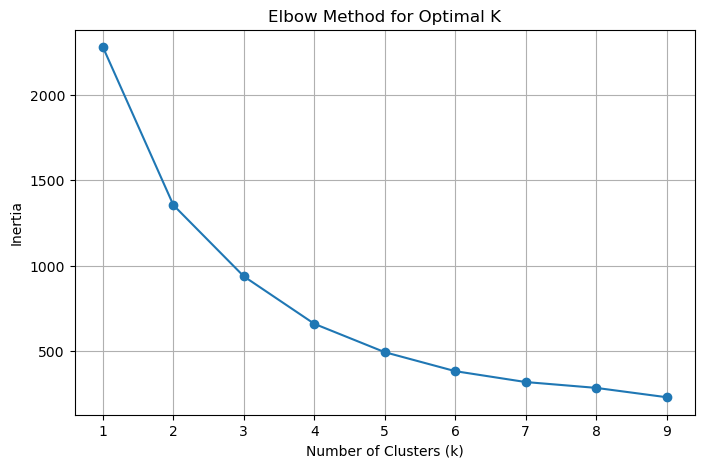

C:\Users\nothi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


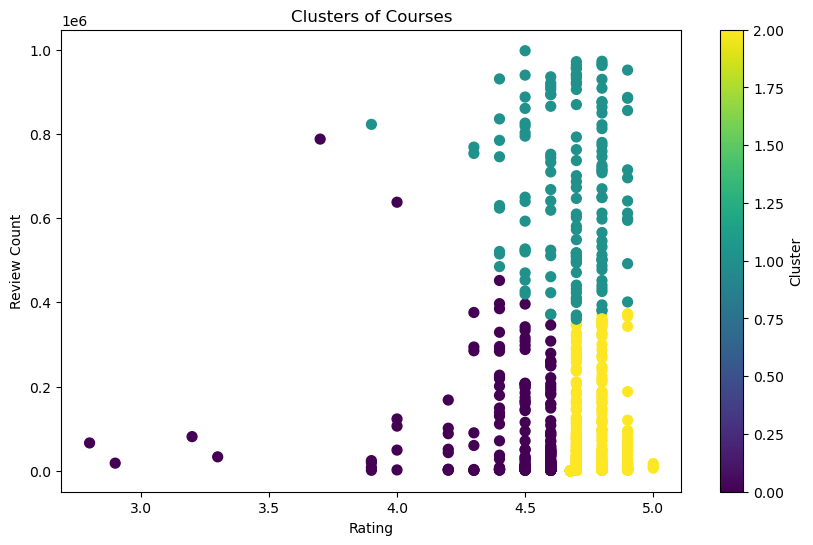

Clustered data saved to clustered_courses.csv


In [2]:
# Import required libraries
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Load the dataset
file_path = 'course.csv'  # Replace with your actual file path
data = pd.read_csv(r"C:\Users\nothi\OneDrive\Desktop\AI-ML\course.csv")

# Step 1: Preprocess the 'reviewcount' column
# Convert 'reviewcount' to numeric (handling 'k' and missing values)
data['reviewcount'] = pd.to_numeric(
    data['reviewcount'].str.replace('k', ''), errors='coerce'
).fillna(0) * 1000

# Step 2: Handle missing values in 'rating' or 'reviewcount'
# Replace NaN in 'rating' with the mean value of the column
data['rating'] = data['rating'].fillna(data['rating'].mean())
# Replace NaN in 'reviewcount' with 0 (already handled above)

# Select features for clustering
features = data[['rating', 'reviewcount']]

# Step 3: Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Step 4: Apply K-Means Clustering
# Determine the optimal number of clusters using the elbow method
inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(range(1, 10), inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid()
plt.show()

# Based on the elbow curve, choose k=3 for clustering
kmeans = KMeans(n_clusters=3, random_state=42)
data['cluster'] = kmeans.fit_predict(scaled_features)

# Step 5: Visualize Clusters
plt.figure(figsize=(10, 6))
plt.scatter(
    features['rating'],
    features['reviewcount'],
    c=data['cluster'],
    cmap='viridis',
    s=50
)
plt.title('Clusters of Courses')
plt.xlabel('Rating')
plt.ylabel('Review Count')
plt.colorbar(label='Cluster')
plt.show()

# Step 6: Save the clustered data
output_file = 'clustered_courses.csv'
data.to_csv(output_file, index=False)
print(f"Clustered data saved to {output_file}")


Clustered data saved to clustered_courses.csv


C:\Users\nothi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


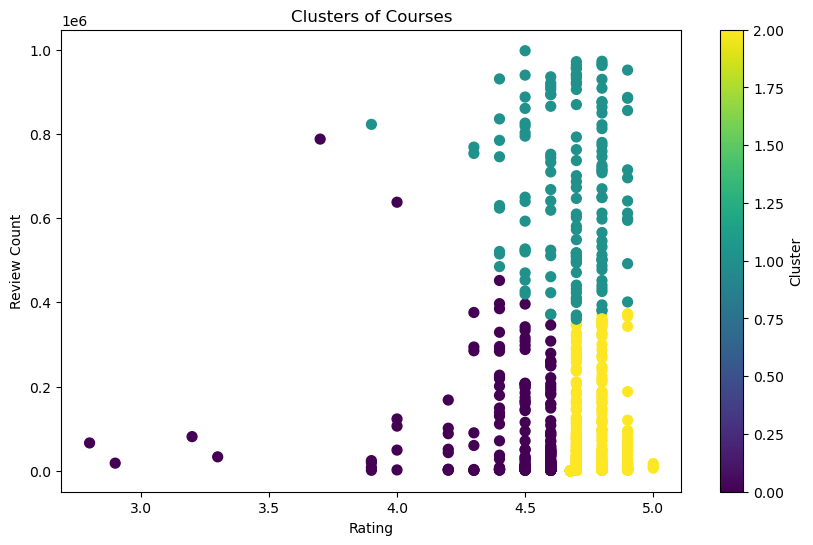

Enter the new course name :  AGENTIC AI
Enter the rating of this course :  3.8
Enter the review count of this new course :  1000


The AGENTIC AI with rating 3.8 and review count 1000 belongs to cluster 0.


C:\Users\nothi\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [6]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


file_path = 'course.csv'  
data = pd.read_csv(r"C:\Users\nothi\OneDrive\Desktop\AI-ML\course.csv")


data['reviewcount'] = pd.to_numeric(
    data['reviewcount'].str.replace('k', ''), errors='coerce'
).fillna(0) * 1000


data['rating'] = data['rating'].fillna(data['rating'].mean())


features = data[['rating', 'reviewcount']]


scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


kmeans = KMeans(n_clusters=3, random_state=42)
data['cluster'] = kmeans.fit_predict(scaled_features)


output_file = 'clustered_courses.csv'
data.to_csv(output_file, index=False)

print(f"Clustered data saved to {output_file}")


plt.figure(figsize=(10, 6))
plt.scatter(
    features['rating'],
    features['reviewcount'],
    c=data['cluster'],
    cmap='viridis',
    s=50
)
plt.title('Clusters of Courses')
plt.xlabel('Rating')
plt.ylabel('Review Count')
plt.colorbar(label='Cluster')
plt.show()


def predict_new_course(rating, reviewcount,coursename):
    new_data = scaler.transform([[rating, reviewcount]])
    predicted_cluster = kmeans.predict(new_data)[0]
    return predicted_cluster
new_course_name = input("Enter the new course name : ")
new_course_rating = float(input("Enter the rating of this course : "))
new_course_reviewcount = int(input("Enter the review count of this new course : "))
predicted_cluster = predict_new_course(new_course_rating, new_course_reviewcount,new_course_name)
print(f"The {new_course_name} with rating {new_course_rating} and review count {new_course_reviewcount} belongs to cluster {predicted_cluster}.")
